In [115]:
import numpy as np
import pandas as pd
import seaborn as sns

In [116]:
users = pd.read_table('ml-1m/users.dat', encoding='latin-1', delimiter='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies = pd.read_table('ml-1m/movies.dat', encoding='latin-1', delimiter='::', engine='python', names=['MovieID', 'Title', 'Genres'])
ratings = pd.read_table('ml-1m/ratings.dat', encoding='latin-1', delimiter='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

In [117]:
m1 = pd.merge(ratings, movies, on='MovieID')
m2 = pd.merge(m1, users, on='UserID')

In [118]:
# general pivot table where we can see average rating for sex/age and votes count for sex/age
pt = pd.pivot_table(m2, columns=['Gender', 'Age'], index='Title', values='Rating', fill_value=0, aggfunc=[np.average, np.sum])
pt

average                      \
Gender                                           F                       
Age                                             1         18        25   
Title                                                                    
$1,000,000 Duck (1971)                         0.0  5.000000  3.333333   
'Night Mother (1986)                           3.0  4.500000  3.500000   
'Til There Was You (1997)                      2.0  2.666667  2.666667   
'burbs, The (1989)                             0.0  3.035714  2.540541   
...And Justice for All (1979)                  0.0  0.000000  3.777778   
...                                            ...       ...       ...   
Zed & Two Noughts, A (1985)                    0.0  3.000000  3.333333   
Zero Effect (1998)                             4.5  4.000000  3.821429   
Zero Kelvin (Kjærlighetens kjøtere) (1995)     0.0  0.000000  0.000000   
Zeus and Roxanne (1997)                        1.0  2.500000  3.000000   
eXistenZ (1999)                                4.0  2.714286  3.181818   

                                                                          \
Gender                                                                     
Age                                               35        45        50   
Title                                                                      
$1,000,000 Duck (1971)                      3.222222  0.000000  3.333333   
'Night Mother (1986)                        3.000000  3.750000  2.750000   
'Til There Was You (1997)                   3.000000  2.500000  2.500000   
'burbs, The (1989)                          3.062500  2.000000  3.142857   
...And Justice for All (1979)               3.750000  4.000000  3.666667   
...                                              ...       ...       ...   
Zed & Two Noughts, A (1985)                 3.750000  0.000000  0.000000   
Zero Effect (1998)                          3.666667  4.000000  4.333333   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  0.000000  0.000000  0.000000   
Zeus and Roxanne (1997)                     3.500000  0.000000  0.000000   
eXistenZ (1999)                             2.846154  3.666667  3.500000   

                                                                          \
Gender                                                       M             
Age                                               56        1         18   
Title                                                                      
$1,000,000 Duck (1971)                      0.000000  0.000000  2.600000   
'Night Mother (1986)                        0.000000  1.000000  5.000000   
'Til There Was You (1997)                   3.000000  5.000000  2.000000   
'burbs, The (1989)                          1.000000  4.500000  3.338710   
...And Justice for All (1979)               4.333333  3.000000  3.428571   
...                                              ...       ...       ...   
Zed & Two Noughts, A (1985)                 0.000000  1.000000  0.000000   
Zero Effect (1998)                          3.500000  4.000000  3.865385   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  0.000000  0.000000  0.000000   
Zeus and Roxanne (1997)                     0.000000  1.600000  2.500000   
eXistenZ (1999)                             0.000000  3.076923  3.405797   

                                                      ... sum              \
Gender                                                ...   F           M   
Age                                               25  ...  45  50  56  1    
Title                                                 ...                   
$1,000,000 Duck (1971)                      3.000000  ...   0  10   0   0   
'Night Mother (1986)                        3.250000  ...  15  11   0   1   
'Til There Was You (1997)                   2.666667  ...   5   5   6   5   
'burbs, The (1989)                          2.705128  ...   6  22   1   9   
...And Justice for All (1979)     

In [119]:
# now we want to visualize a top 10 movies for M 18+ audience with 10+ votes so to start with we are getting only M 18+ records
s1 = m2[(m2.Gender == 'M') & (m2.Age == 18)]

In [120]:
# and then filter it by number of votes
s2 = s1.groupby("Title", as_index=False).filter(lambda x: len(x) >= 10)

In [124]:
pt_M18_over10 = pd.pivot_table(s2, index='Title', values='Rating')
pt_M18_over10

,Rating
Title,
"'burbs, The (1989)",3.338710
10 Things I Hate About You (1999),3.382857
101 Dalmatians (1961),3.229730
101 Dalmatians (1996),2.375000
12 Angry Men (1957),4.161765
...,...
"Young Poisoner's Handbook, The (1995)",3.928571
Young Sherlock Holmes (1985),3.604651
Your Friends and Neighbors (1998),3.782609


In [122]:
s3 = s2.groupby('Title', as_index=False)['Rating'].mean()
s3 = pd.DataFrame(s3)
s3 = s3.sort_values('Rating', ascending=False)
s3 = s3.head(10)
s3

,Title,Rating
1911,"Usual Suspects, The (1995)",4.700658
1630,"Shawshank Redemption, The (1994)",4.699708
1613,Seven Samurai (The Magnificent Seven) (Shichin...,4.635135
730,"Godfather, The (1972)",4.570470
379,"Close Shave, A (1995)",4.550562
74,American Beauty (1999),4.540643
420,Crimes and Misdemeanors (1989),4.535714
1136,"Matrix, The (1999)",4.534676
1048,Life Is Beautiful (La Vita è bella) (1997),4.527607
1324,One Flew Over the Cuckoo's Nest (1975),4.526042


<AxesSubplot: xlabel='Rating', ylabel='Title'>

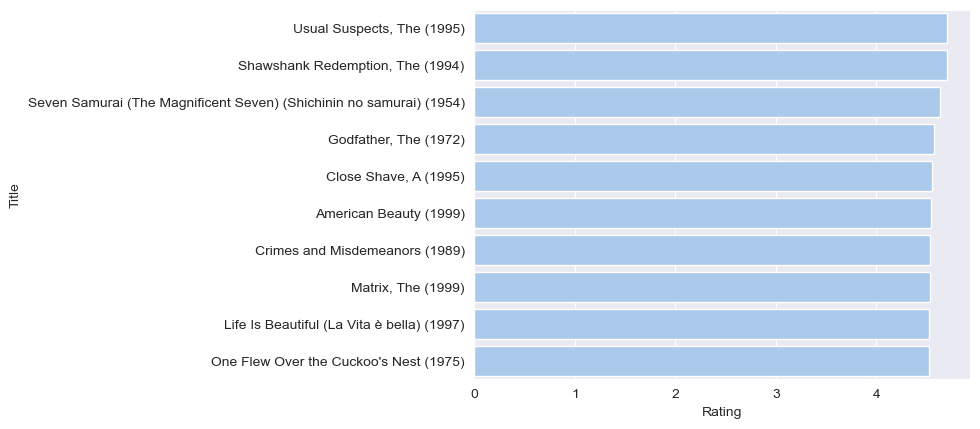

In [123]:
sns.set_color_codes("pastel")
sns.barplot(x="Rating", y="Title", data=s3,
            label="", color="b")